# Suitability Function

Suitability fuctions are used to convert indicator to suitability values. `lsapy` support two types of suitability function: discrete function (`DiscreteSuitFunction`) and membership function (`MembershipSuitFunction`), both embedded in `SuitabilityFunction`.

In [ ]:
# import libraries
from lsapy.functions import DiscreteSuitFunction, MembershipSuitFunction, SuitabilityFunction

## Discrete Suitability Function

The simplest case! Discrete function is used to convert discrete indicator values to suitability. Thus, the computation is quite straight forward and we simply attribute a suitability value to each discrete value. This is done by providing the rules as parameters of the function and where rules is a `dict` with the indicator value as key and the associated suitability as value.  
Below is an example:

In [ ]:
x = [1,2,3,4,5] # discrete indicator values
rules = {1:0, 2:0, 3:0.2, 4:0.6, 5:1} # suitability values

func = DiscreteSuitFunction(func_params={'rules':rules}) # initialize the function
func(x)

array([0. , 0. , 0.2, 0.6, 1. ], dtype=float32)

`DiscreteSuitFunction` also support `str` indicators values.

In [ ]:
x = ['1','2','3','4','5'] # discrete indicator values
rules = {'1':0, '2':0, '3':0.2, '4':0.6, '5':1} # suitability values

func = DiscreteSuitFunction(func_params={'rules':rules}) # initialize the function
func(x)

array([0. , 0. , 0.2, 0.6, 1. ], dtype=float32)

## Membership Suitability Function

Membership functions are a bit more complex and are used to convert continuous indicators to suitability. Several functions are available in `MembershipSuitFunction` allowing flexibility in the shape of the curve. The first step is thus to determine which function we should use and with which parameters and `MembershipSuitFunction.fit` method can help in that way.

Let's say we have indicator value ranging from 750 to 2000 and we know that suitability values of 0, 0.25, 0.5, 0.75, 1 correspond respectively to 1000, 1150, 1250, 1350, 1500. We can use this information to fit membership functions and determine which one it the best.

In [ ]:
MembershipSuitFunction.fit(x=[1000,1150,1250,1350,1500], y=[0,0.25,0.5,0.75,1])


Best fit: vetharaniam2022_eq5
RMSE: 0.03187
Params: a=-0.875896889227584, b=1248.439341046477



(<function lsapy.functions.logistic_vetharaniam2022_eq5(x, a, b)>,
 array([-8.75896889e-01,  1.24843934e+03]))

The result of the fit says that best membership function is 'vetharaniam2022_eq5' with the parameters a=-0.876 and b=1248.  
We can also plot the results of the fitting for a better understanding.

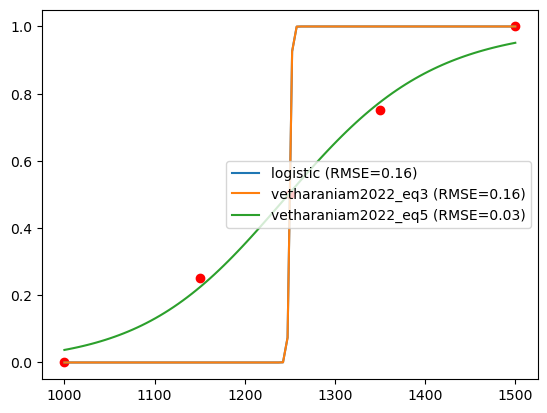


Best fit: vetharaniam2022_eq5
RMSE: 0.03187
Params: a=-0.875896889227584, b=1248.439341046477



(<function lsapy.functions.logistic_vetharaniam2022_eq5(x, a, b)>,
 array([-8.75896889e-01,  1.24843934e+03]))

In [ ]:
MembershipSuitFunction.fit(x=[1000,1150,1250,1350,1500], y=[0,0.25,0.5,0.75,1], plot=True)

We can now use the results of the fitting to convert indicator value into suitability.

In [ ]:
import numpy as np

func = MembershipSuitFunction(func_method='vetharaniam2022_eq5', func_params={'a':-0.876, 'b':1248})
x = np.linspace(750, 2000, 100) # indicator values: create a array of 100 values between 750 and 2000
func(x)

array([9.51763219e-04, 1.16351351e-03, 1.41995462e-03, 1.73002204e-03,
       2.10433617e-03, 2.55549809e-03, 3.09843185e-03, 3.75077893e-03,
       4.53335084e-03, 5.47064528e-03, 6.59143118e-03, 7.92940633e-03,
       9.52392964e-03, 1.14208266e-02, 1.36732623e-02, 1.63426683e-02,
       1.94997030e-02, 2.32252088e-02, 2.76111167e-02, 3.27612262e-02,
       3.87917639e-02, 4.58315947e-02, 5.40219283e-02, 6.35153298e-02,
       7.44738175e-02, 8.70658115e-02, 1.01461706e-01, 1.17827874e-01,
       1.36318996e-01, 1.57068765e-01, 1.80179198e-01, 2.05709100e-01,
       2.33662485e-01, 2.63978079e-01, 2.96521234e-01, 3.31079649e-01,
       3.67364089e-01, 4.05014912e-01, 4.43614498e-01, 4.82704891e-01,
       5.21809179e-01, 5.60454541e-01, 5.98194622e-01, 6.34629046e-01,
       6.69418383e-01, 7.02293584e-01, 7.33059720e-01, 7.61594552e-01,
       7.87842925e-01, 8.11808271e-01, 8.33542475e-01, 8.53135247e-01,
       8.70703871e-01, 8.86383941e-01, 9.00321423e-01, 9.12666175e-01,
      

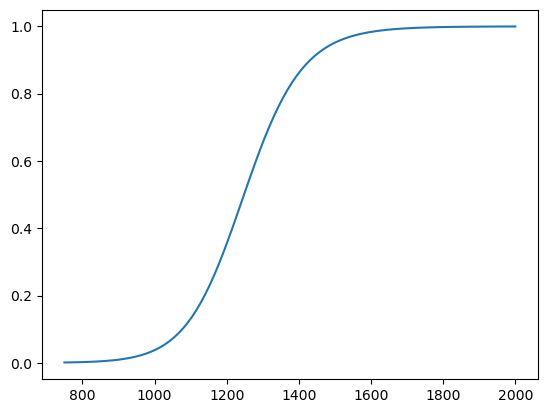

In [ ]:
func.plot(x)

## Suitability Function

`DiscreteSuitFunction` and `MembershipSuitFunction` are encompassed in `SuitabilityFunction`, so the latter can be used for all type of membership function.  

For example with discrete function:

In [ ]:
func = DiscreteSuitFunction(func_params={'rules':{'1':0, '2':0, '3':0.2, '4':0.6, '5':1}})
func(['1','2','3','4','5'])


array([0. , 0. , 0.2, 0.6, 1. ], dtype=float32)

is equivalent to:

In [ ]:
func = SuitabilityFunction(func_method='discrete', func_params={'rules':{'1':0, '2':0, '3':0.2, '4':0.6, '5':1}})
func(['1','2','3','4','5'])

array([0. , 0. , 0.2, 0.6, 1. ], dtype=float32)